In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


In [3]:
df.isnull().values.any()

True

In [4]:
# - Checking to see which value is the null value. Who that person is and how removing them will affect the data set.
df[df['salary'].isnull()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
208,NaN,0,21,10,0.93,1,0,3,1,4,1


In [5]:
df['yearsrank'].median()

5.0

In [6]:
# - Dropping row with null value
df_new = df.dropna(axis=0, inplace=True)

In [7]:
# - Checking to confirm that the df has no null values
df.isnull().values.any()

False

### EDA

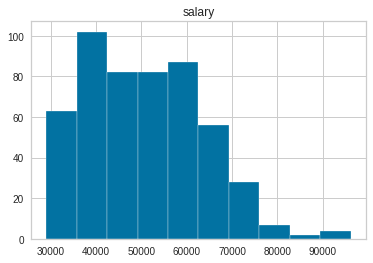

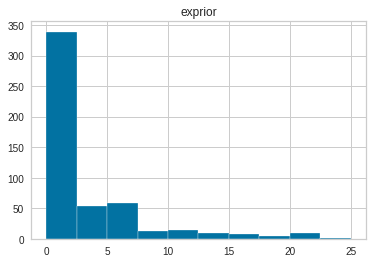

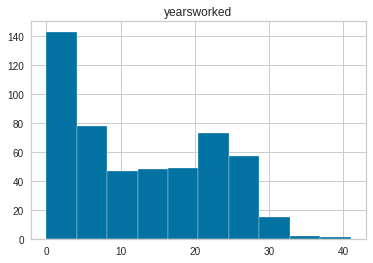

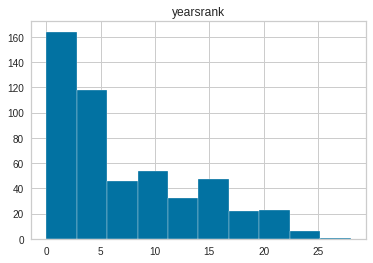

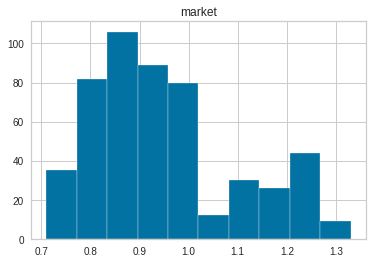

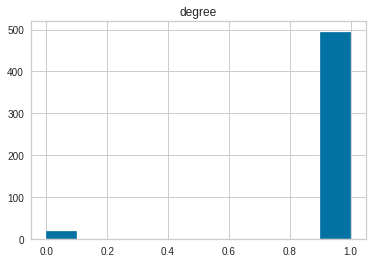

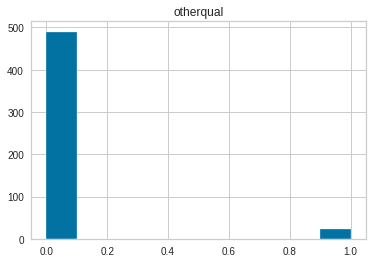

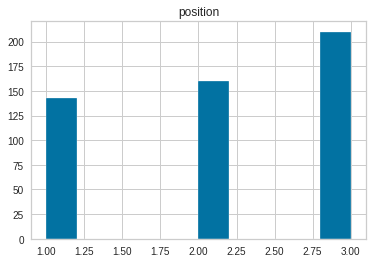

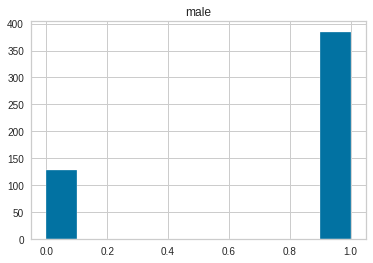

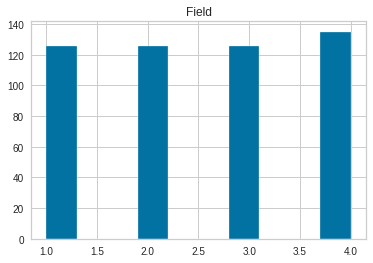

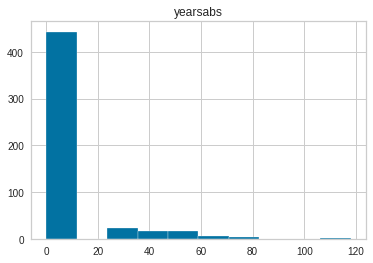

In [8]:
# plotting histogram for each column to see which columns I can use
for i in list(df.columns):
    plt.hist(df[i])
    plt.title(i)
    plt.show()

- For exprior, yearsworked, yearsrank and market the data is distributed to the right. This means that most of that data in the sample set sits in the right side. 

- From this we can interpret that: 
- most of the people in the sample set earn salaries low salaries
- most of the people in the sample set do not have much experience prior to their current careers.
- most of the people in the sample set aren't in their careers very long
- most of the people in the sample set have a market value below the median. This also means that most of the people earn a salary below the market value.

- We can also see that almost everyone has a degree. Less than 50 people don't have degrees
- Most participants do not have any other post-secondary qualification. Less than 50 people have
- Most participants are in executive positions
- Most of the participants are men
- Most of the participants are in marketing. Engineering, Finance and HR have the same amount of participants.
- Almost everyone has been absent from work 10 years or less. Very few people have surpassed that amount of time.

In [9]:
df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778


- After examining the correlation between all the columns, I can conclude that yearsworked, yearsrank and position are columns I could use to model. 

# MULTIVARIATE LINEAR REGRESSION


In [10]:
dummies_df = pd.get_dummies(df.Field)
dummiess_df= pd.get_dummies(df.position, prefix = 'p')
dummiess_df.head()

,p_1,p_2,p_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
mlr_df = pd.concat([df,dummies_df,dummiess_df], axis=1)
mlr_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,1,2,3,4,p_1,p_2,p_3
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [12]:
mlr_df.isnull().values.any()

False

In [13]:
mlr_df.rename(columns={1:'Engineering',2:'Finance',3:'Human Resources',4:'Marketing','p_1':'Junior Employee','p_2':'Manager','p_3':'Executive'}, inplace=True)
mlr_df.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
0,53000.0,0,0,0,1.17,1,0,1,1,3,0,0,0,1,0,1,0,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0,0,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2,0,0,1,0,1,0,0
3,35782.0,0,2,1,0.99,1,0,1,1,4,1,0,0,0,1,1,0,0
4,34731.0,0,2,2,0.91,1,0,1,1,4,1,0,0,0,1,1,0,0


In [14]:
mlr_df.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs,Engineering,Finance,Human Resources,Marketing,Junior Employee,Manager,Executive
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.499316,-0.069630,0.426059,0.231626,-0.435815,-0.216884,-0.539491,-0.197214,0.677755
exprior,0.119989,1.000000,-0.245788,-0.065893,-0.035202,-0.049165,0.264655,0.118031,0.047276,-0.046854,0.132022,0.053511,0.001509,-0.041037,-0.013669,-0.088265,-0.037850,0.116147
yearsworked,0.623589,-0.245788,1.000000,0.813456,-0.070740,0.028122,-0.040157,0.746311,0.278286,-0.264208,0.056113,0.218146,0.151929,-0.267442,-0.100326,-0.637331,-0.085959,0.662155
yearsrank,0.610706,-0.065893,0.813456,1.000000,-0.026869,0.006347,0.007232,0.484891,0.237397,-0.265620,0.035962,0.198489,0.170245,-0.241413,-0.124460,-0.400405,-0.082329,0.442687
market,0.407214,-0.035202,-0.070740,-0.026869,1.000000,0.036456,0.021641,-0.013116,0.181401,-0.223887,-0.167177,0.198321,0.120408,-0.250358,-0.066834,0.035107,-0.044766,0.010162
degree,0.044554,-0.049165,0.028122,0.006347,0.036456,1.000000,-0.214654,0.043335,0.061419,-0.099077,0.029447,0.084197,0.034974,-0.063472,-0.054448,-0.023213,-0.031694,0.051028
otherqual,0.167137,0.264655,-0.040157,0.007232,0.021641,-0.214654,1.000000,0.160941,0.016082,-0.076202,-0.017792,0.029562,0.095212,-0.079855,-0.043909,-0.113681,-0.064528,0.164458
position,0.702122,0.118031,0.746311,0.484891,-0.013116,0.043335,0.160941,1.000000,0.317390,-0.292313,0.030521,0.262830,0.141211,-0.306571,-0.095280,-0.858025,-0.107338,0.883543
male,0.361564,0.047276,0.278286,0.237397,0.181401,0.061419,0.016082,0.317390,1.000000,-0.130599,-0.622058,0.151101,0.025520,-0.162851,-0.013460,-0.244327,-0.088272,0.305962
Field,-0.499316,-0.046854,-0.264208,-0.265620,-0.223887,-0.099077,-0.076202,-0.292313,-0.130599,1.000000,0.000778,-0.773769,-0.266817,0.240135,0.782461,0.203696,0.122581,-0.301235


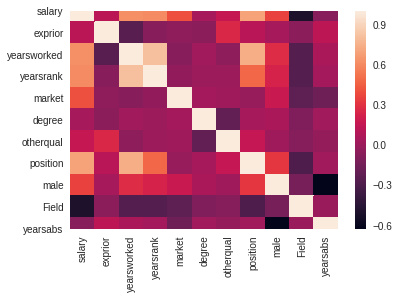

In [15]:
sns.heatmap(df.corr())

In [16]:
t = mlr_df[['yearsworked','yearsrank','Junior Employee','Manager','Executive']]

In [17]:
e = mlr_df['salary']

Text(0.5, 1.0, 'Salary per Number of Years Worked')

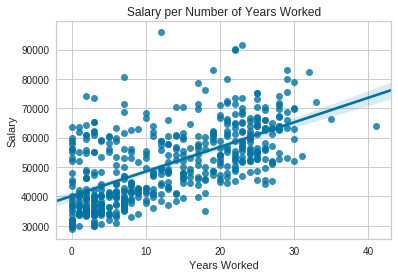

In [18]:
sns.regplot(mlr_df.yearsworked,mlr_df.salary)
plt.xlabel('Years Worked')
plt.ylabel('Salary')
plt.title('Salary per Number of Years Worked')

In [19]:
pearsonr(mlr_df.yearsworked,mlr_df.salary)

(0.6235888657598048, 1.2873351342916404e-56)

As you can see from the above values there is a positive correlation between years worked and salary and this value is statistically significant. Therefore, I can use it to model. From this we can determine that as the number of years increase salary is also likely to increase

Text(0.5, 1.0, 'Salary per Number of Years Worked at Current Rank')

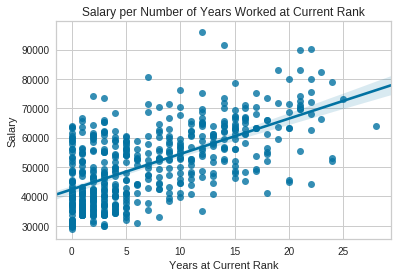

In [20]:
sns.regplot(mlr_df.yearsrank,mlr_df.salary)
plt.xlabel('Years at Current Rank')
plt.ylabel('Salary')
plt.title('Salary per Number of Years Worked at Current Rank')

As you can see from the above values there is a positive correlation between years worked at current rank and salary and this value is statistically significant. Therefore, I can use it to model. From this we can determine that as the number of years increase salary is also likely to increase

In [21]:
pearsonr(mlr_df.yearsrank,mlr_df.salary)

(0.6107063176375227, 9.307173080331551e-54)

In [22]:
# ax = sns.boxplot(mlr_df.Field,mlr_df.salary)
# ax.set_xticklabels(['Engineering', 'Finance','Human Resources','Marketing'])
# plt.title('Distribution of Salaries per Field')
# plt.show()

In [23]:
#pearsonr(mlr_df.Field,mlr_df.salary)

In [24]:
### We can see that there is a negative correlation between field and salary and this value is statistically significant. However this is categorial data. After creating dummy variables for this coloumn it could be used to model. See different fields earn, different salaries. Engineering earns so much more than Human Resources. Therefore if you build a model that doesn't take filed into account it would assume that someone in HR and Engineering with the same yearsworked,  yearsrank and position would earn the same amount. This would be in accurate as you can see the salary for these two fields are different. Therefore, it is neccesary to include Field in your model

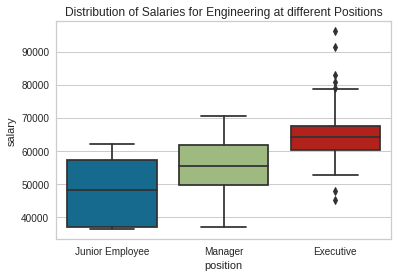

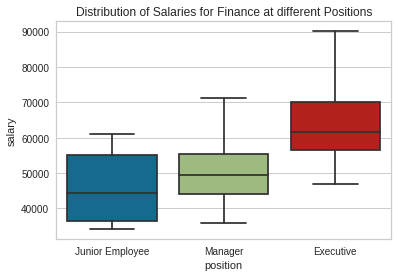

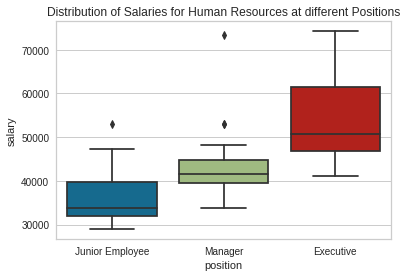

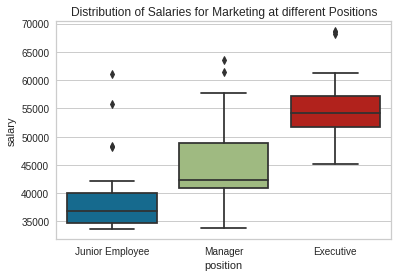

In [25]:
lst=['Engineering', 'Finance','Human Resources', 'Marketing']
count = 0
for i in range(1,5):    
    position_df = mlr_df[mlr_df['Field']==i]
    ay = sns.boxplot(position_df.position,position_df.salary)
    ay.set_xticklabels(['Junior Employee','Manager','Executive'])
    plt.title('Distribution of Salaries for %s at different Positions'% lst[count])
    count+=1
    plt.show()


In [26]:
pearsonr(mlr_df.position,mlr_df.salary)

(0.7021217379212221, 2.164001495311446e-77)

As seen from the values above there is a moderately strong positive relationship between position and salary. The higher your position is the more you are likely to earn. Therefore, it would be useful to use position to model. This is statistically significant

In [27]:
x2_train, x2_test, y2_train, y2_test = train_test_split(t, e, test_size=0.2, random_state=10)

In [28]:
x2_ctrain = sm.add_constant(x2_train.values)

In [29]:
model2 = sm.OLS(y2_train,x2_ctrain).fit()

In [30]:
x2_ctest = sm.add_constant(x2_test.values)
predictions2 = model2.predict(x2_ctest) 

Text(0, 0.5, 'Y - Predicted')

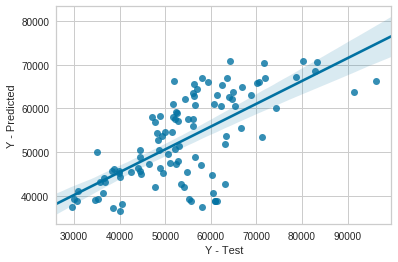

In [31]:
sns.regplot(y2_test,predictions2)
plt.xlabel('Y - Test')
plt.ylabel('Y - Predicted')

This graph looks at the Predicted vs Y-test values to see the relationship between these variables and how much the vary from the model. As you can see there's a moderately strong relationship between the two.

In [44]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     197.3
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           1.09e-93
Time:                        11:23:03   Log-Likelihood:                -4225.9
No. Observations:                 410   AIC:                             8462.
Df Residuals:                     405   BIC:                             8482.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.538e+04    604.188     58.550      0.000    3.42e+04    3.66e+04
x1          -419.7963     96.191     -4.364      0.000    -608.892    -230.701
x2          1042.3652    106.198      9.815      0.000     833.597    1251.134
x3          2142.1761    667.109      3.211      0.001     830.746    3453.606
x4          9810.7062    560.531     17.503      0.000    8708.794    1.09e+04
x5          2.342e+04    910.787     25.717      0.000    2.16e+04    2.52e+04
==============================================================================
Omnibus:                       60.243   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.069
Skew:                           1.041   Prob(JB):                     9.16e-19
Kurtosis:                       3.728   Cond. No.                     2.32e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.43e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- The model does significantly predict the dependant variable as the R^2 value is 0.661, which shows moderate accuracy.

- 66.1% of employees’ salaries is accounted for by our independant variables(yearsworked, yearsrank and positon)

- Holding all other features fixed, a 1 unit increase in **yearsworked and yearsrank** is associated with an **increase of 	1042.3652-419.7963**. On top of that if you'll earn:
  - Junior 2142.1761
  - Manager 9810.7062
  - Excutive 2.342e+04	


In [45]:
#residual = sm.regression.linear_model.RegressionResults.resid(model2)

In [46]:
#fitted_values = sm.regression.linear_model.RegressionResults.fittedvalues(model2)

In [47]:
# sns.residplot(fitted_values,model2.predict(x2_ctrain),lowess=True)
# plt.xlabel('Salaries')
# plt.title('Residual Plot of Actual Salary vs Predicted Salary')

In [48]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, model2.predict(x2_ctest))))
print('TRAINING RMSE:', np.sqrt(metrics.mean_squared_error(y2_train, model2.predict(x2_ctrain))))

TEST RMSE: 9769.497619601649
TRAINING RMSE: 7244.914056525868


Looking at the RMSE scores there are no signs of overfitting or underfitting. The test is higer than the train values which makes sense as the model should be more accurate in predicting values it has already seen in the training set.

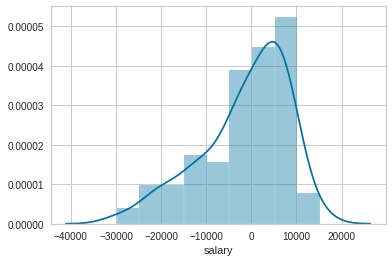

In [49]:
sns.distplot(model2.predict(x2_ctest)-y2_test)

Looking at the distplot you can see that most of the values are between 0 and 10 000 this is a sign of a model that is able to significantly predict as most of the values are closer to 0.

# Model with sklearn

In [50]:
reg = LinearRegression().fit(x2_train, y2_train)

In [51]:
reg_predictions = reg.predict(x2_test) 

Text(0, 0.5, 'Y - Predicted')

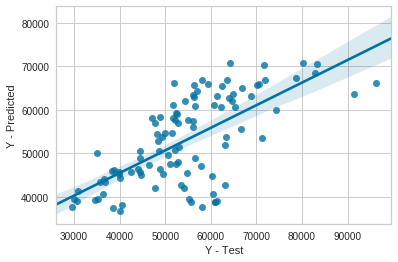

In [52]:
sns.regplot(y2_test,reg_predictions)
plt.xlabel('Y - Test')
plt.ylabel('Y - Predicted')

In [53]:
reg.score(x2_train, y2_train)

0.6608316655882909

In [54]:
print('TEST RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, reg.predict(x2_test))))
print('TRAINING RMSE:', np.sqrt(metrics.mean_squared_error(y2_train, reg.predict(x2_train))))

TEST RMSE: 9769.497619601641
TRAINING RMSE: 7244.9140565258695


Looking at the RMSE scores there are no signs of overfitting or underfitting and they are the same as the statsmodel with the constant. The test is higer than the train values which makes sense as the model should be more accurate in predicting values it has already seen in the training set.

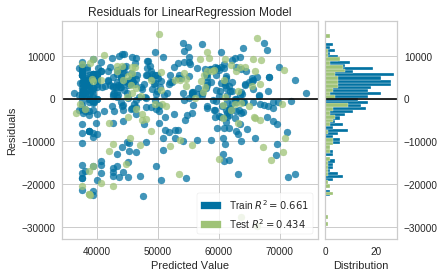

In [55]:
model1 = Ridge()
visualizer = ResidualsPlot(reg)

visualizer.fit(x2_train, y2_train)  
visualizer.score(x2_test, y2_test)  
visualizer.show()

Looking at the distplot you can see that most of the values are between 0 and 10 000 this is a sign of a model that is able to significantly predict as most of the values are closer to 0.

### As you can see the model where from statsmodel and the one from sklearn where I did not add a constant and it was added for me by sklearn have the same accuraccy and RMSE